##  Define functions

In [1]:
from urllib.request import urlopen, urlretrieve 


import os
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset(data_path, **kws):
    '''
    load an dataset from local fileSystem, 
    if load file fail, then load an dataset from the online repository (requires internet).

    Parameters
    ----------
    data_path : string,
        the dataset path in local fileSystem.
    kws : keys and values, optional
        Additional keyword arguments are passed through to func: 'pandas.read_csv'.
    Returns
    -------
    data_frame : pandas.DataFrame
    '''
    
    try:
        from urllib import request, error
        from io import StringIO
        import pandas as pd
        import os
        import csv
    except ImportError as e:
        raise ImportError('You must install ' + e.name) from e
    
    local_cache = True
    if data_path is None:
        raise ValueError('dataset path invalid.')
    if not os.path.exists(data_path):
        local_cache = False
        data_name = os.path.basename(data_path)
        url = 'https://raw.githubusercontent.com/Crystal-girl/learning-seaborn/master/seaborn-data/'
        data_url = os.path.join(url, data_name)
        try:
            data = request.urlopen(data_url).read().decode('utf-8').split('\n')
        except error.URLError as e:
            raise error.URLError('neither local and online dataset not found.') from e
        data_file = StringIO(data)
        csv_reader = csv.reader(data_file)
        data_list = [raw for raw in csv_reader]
        data_frame = pd.DataFrame(data_list[1: ], columns=data_list[0])
        return data_frame
    
    data_frame = pd.read_csv(data_path, **kws)
    return data_frame

In [3]:
# this is my local dataset path, need to be changed to your own dataset path. 
path = 'E:\learning-seaborn\seaborn-data' 

## Relational plots

#### relplot
> 用于将关系图绘制到FacetGrid上的图形级界面。
* 参数详解见: http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [5]:
sns.set_style(style='ticks')

tips = load_dataset(os.path.join(path, 'tips.csv'))
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips['day'] = tips['day'].astype('category')
tips['sex'] = tips['sex'].astype('category')
tips['time'] = tips['time'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')

In [13]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

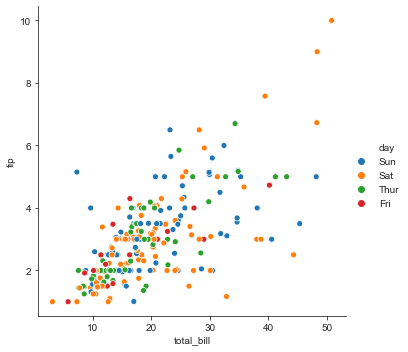

In [7]:
# Assigning x and y and any semantic mapping variables will draw a single plot.
# 指定参数 x、y 与 hue(包含多元素变量)，将被绘制在一张图中。
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')

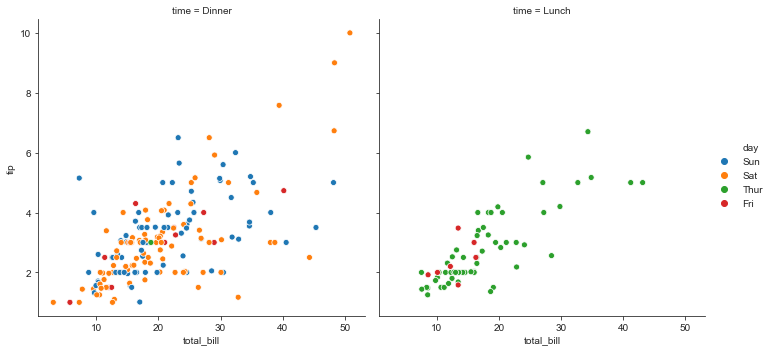

In [8]:
# Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid.
# 指定参数 x、y、hue(包含多元素变量) 与 绘制 n(n为指定col所包含的类别数量或离散值个数) 张子图的col，将n张子图呈网格状态绘制在一张图中。
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time')

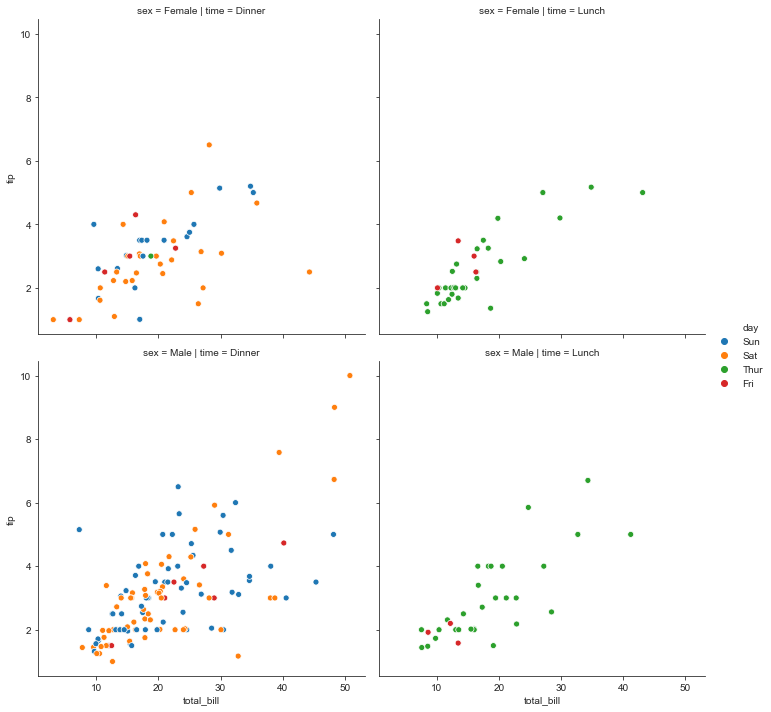

In [9]:
# Different variables can be assigned to facet on both the columns and rows.
'''
指定参数 x、y、hue(包含多元素变量)、col 与 row，绘制 n * m(col 与 row 所包含元素的笛卡尔积，n为指定col 所包含的类别数量或离散值个数,
m为指定raw 所包含的类别数量或离散值个数) 张子图，将n * m张子图呈网格状态绘制在一张图中。
'''
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time', row='sex')

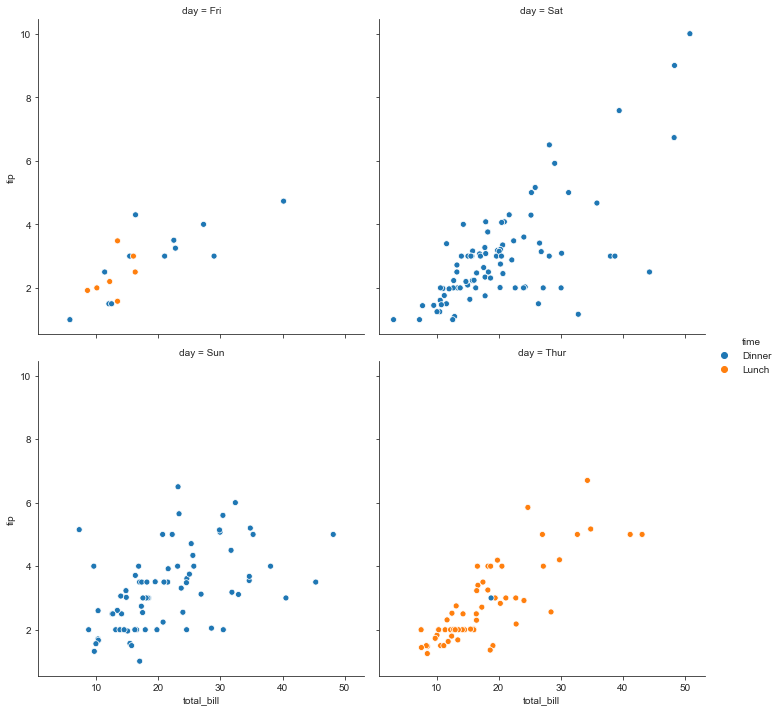

In [10]:
# When the variable assigned to col has many levels, it can be 'wrapped' across multiple rows.
# 当指定参数 col 包含多个元素时， 可以指定参数 col_wrap 限制 绘制col 子图的宽度。
sns.relplot(data=tips, x='total_bill', y='tip', hue='time', col='day', col_wrap=2)

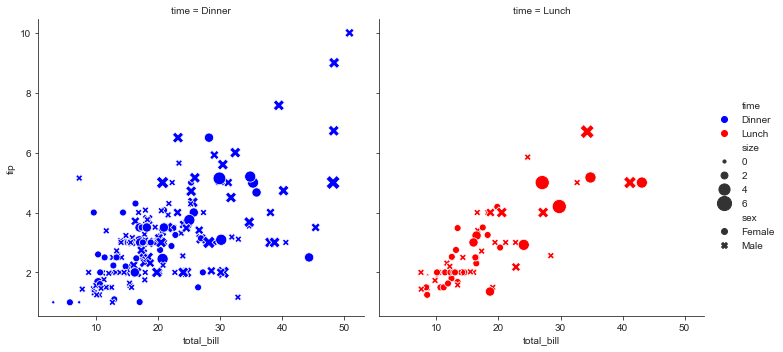

In [12]:
# Assigning multiple semantic variables can show multi-dimensional relationships, but be mindful to avoid making an overly-complicated plot.
'''
分配多个语义变量可以显示多维关系，但请注意避免绘制过于复杂的图。
参数size 指定 为变量的元素集合，参数style 指定 为变量的元素集合，
参数palette 指定 为 hue 子图配色， 参数sizes 指定 为 size 取值的范围。
'''
sns.relplot(
    data=tips, x='total_bill', y='tip', col='time',
    hue='time', size='size', style='sex',
    palette=['blue', 'red'], sizes=(10, 200)
)

In [12]:
fmri = load_dataset(os.path.join(path, 'fmri.csv'))
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [13]:
fmri['event'] = fmri['event'].astype('category')
fmri['region'] = fmri['region'].astype('category')

In [14]:
fmri.dtypes

subject        object
timepoint       int64
event        category
region       category
signal        float64
dtype: object

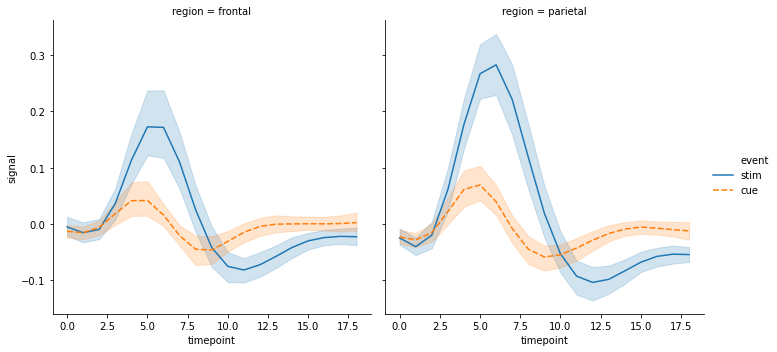

In [15]:
'''
When there is a natural continuity to one of the variables, it makes more sense to show lines instead of points.
Using kind='line' offers the same flexibility for semantic mappings as kind='scatter', 
but lineplot() transforms the data more before plotting. 
'''
'''
当其中一个变量具有自然连续性时，更有意义的是显示线而不是点。使用参数 kind='line' 提供与 kind ='scatter' 相同的灵活性，
但是lineplot() 可以在绘制之前对数据进行更多的转换。
'''
sns.relplot(
    data=fmri, x='timepoint', y='signal', col='region',
    hue='event', style='event', kind='line',
)

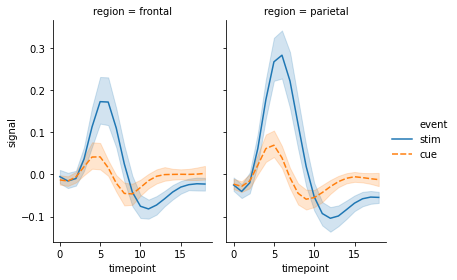

In [16]:
# The size and shape of the figure is parametrized by the height and aspect ratio of each individual facet.
'''
参数 height 指定每一个子图的高度，参数 aspect 指定每一个子图宽度的缩放比例。
'''
sns.relplot(
    data=fmri,
    x='timepoint', y='signal',
    hue='event', style='event', col='region',
    height=4, aspect=.7, kind='line'
)

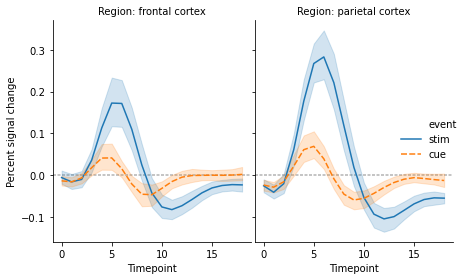

In [18]:
'''
The object returned by relplot() is always a FacetGrid, which has several methods that allow you to quickly tweak the title, labels,
and other aspects of the plot.
'''
'''
replot()返回对象为 FaceGrid，提供许多内置函数，可以改变图标题、标签和其他功能。
'''
g = sns.relplot(
    data=fmri,
    x='timepoint', y='signal',
    hue='event', style='event', col='region',
    height=4, aspect=.7, kind='line'
)
g.map(plt.axhline, y=0, color='.7', dashes=(2, 1), zorder=0) \
    .set_axis_labels('Timepoint', 'Percent signal change') \
    .set_titles('Region: {col_name} cortex') \
    .fig.tight_layout(w_pad=0) # 针对参考代码进行修改

In [4]:
flights_wide = load_dataset(os.path.join(path, 'flights.csv')).pivot('year', 'month', 'passengers')
flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


In [5]:
flights_wide.dtypes

month
April        int64
August       int64
December     int64
February     int64
January      int64
July         int64
June         int64
March        int64
May          int64
November     int64
October      int64
September    int64
dtype: object

![Aaron Swartz](raw.githubusercontent.com/Crystal-girl/learning-seaborn/master/pic_problems/dashes_problem.png)

* seaborn relplot 绘制图时，参数dashes 默认为True, 不指定dashes参数时, 采用函数内部定义参数 default_dashes，default_dashes 只包含6个dash配置，当dash配置超过6个时，则需要用户指定参数dashes 使dashes和变量的长度保持一致。(dash 配置元组长度需为偶数。)

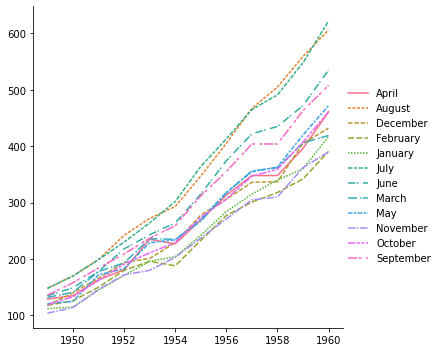

In [10]:
dashes = ['', (2, 1), (3, 1.2), (4, 1.5), (1, 1), (3, 1, 2, 1), (5, 1, 1, 3), (6, 2, 1, 1),
        (3, 1, 1.5, 1), (5, 1, 1, 1), (5, 1, 2, 1, 2, 1), (6, 1, 2, 3, 2, 1)
    ]
sns.relplot(data=flights_wide, dashes=dashes, kind='line') # 针对参考代码进行修改